## โหลดรูปเบื้องต้น

In [1]:
import cv2
from matplotlib import table
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

output_folder = Path("../data/output_images/output_lines")
output_folder.mkdir(exist_ok=True)

def face_detection(gray_img):
    face_cascade = cv2.CascadeClassifier('experiment_and_research/files/haarcascade_frontalface_default.xml')

    #จำแนกใบหน้า
    scaleFactor = 1.1
    minNeighber = 12
    face_detect = face_cascade.detectMultiScale(gray_img, scaleFactor, minNeighber)

    expand_ratio = 0.6  # อัตราส่วนการขยาย (50% ของขนาดเดิม)
    for (x, y, w, h) in face_detect:
        # คำนวณขนาดขยาย
        x_exp = int(x - expand_ratio * w)
        y_exp = int(y - expand_ratio * h)
        w_exp = int(w + 2 * (expand_ratio) * w)
        h_exp = int(h + 2 * (expand_ratio+0.3) * h)

        # ตรวจสอบไม่ให้เกินขอบภาพ
        x_exp = max(0, x_exp)
        y_exp = max(0, y_exp)
        w_exp = min(gray_img.shape[1] - x_exp, w_exp)
        h_exp = min(gray_img.shape[0] - y_exp, h_exp)

        # วาดกรอบ
        cv2.rectangle(gray_img, (x_exp, y_exp), (x_exp + w_exp, y_exp + h_exp), (255, 255, 255), thickness=-1)
        cv2.imwrite("../data/output_images/output/face_remove.jpg", gray_img)

    return gray_img

# โหลดภาพ
#image = cv2.imread("../data/test_images/transcript/pun_20240817_0001.jpg")
#image = cv2.imread("../data/test_images/transcript/pun_f.jpg")
image = cv2.imread("../data/test_images/word_images/test2.png")
#image = cv2.imread("../data/test_images/transcript/Transcript2.jpg")
if image is None:
    raise FileNotFoundError("ไม่พบไฟล์ภาพ กรุณาตรวจสอบเส้นทางของไฟล์")

# แปลงเป็น Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_img = face_detection(gray)

# การ Threshold แบบ Adaptive Gaussian
binary_image = cv2.adaptiveThreshold(
    gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51,30
)

kernel = np.ones((5, 90), np.uint8)
lines = cv2.dilate(binary_image, kernel, iterations=1)

cv2.imwrite("../data/output_images/output/gary.jpg", gray_img)
cv2.imwrite("../data/output_images/output/binary.jpg", binary_image)
cv2.imwrite("../data/output_images/output/line.jpg", lines)

#kernel = np.ones((3,9), np.uint8)
dilalated_line_img = cv2.dilate(binary_image, kernel, iterations=1)

cv2.imwrite("../data/output_images/output/cca.jpg", image)

True

# จับกลุ่มข้อความ

3


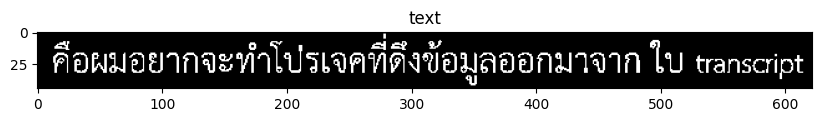

In [2]:
def detect_text_group(dilalated_image, binary_image):
    image = binary_image
    text_group_images = []
    # ใช้ Connected Component Analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilalated_image, connectivity=8)

    expand_ratio = 0.0  # อัตราส่วนการขยาย (0.5 คือ 50% ของขนาดเดิม)
    reduce_size = 0.00
    for idx, i in enumerate(range(1, num_labels)):  # เริ่มจาก 1 เพราะ 0 คือ background
        x, y, w, h, area = stats[i]
        x_exp = int(x - (expand_ratio-reduce_size) * w)
        y_exp = int(y - (expand_ratio) * h)
        w_exp = int(w + 2 * (expand_ratio-reduce_size) * w)
        h_exp = int(h + 2 * (expand_ratio) * h)

        # ตรวจสอบไม่ให้เกินขอบภาพ
        x_exp = max(0, x_exp)
        y_exp = max(0, y_exp)
        w_exp = min(image.shape[1] - x_exp, w_exp)
        h_exp = min(image.shape[0] - y_exp, h_exp)

        if w >= 90 and h >= 20:  # ปรับค่าขนาดขั้นต่ำและสูงสุดตามต้องการ
            cca_img = image[y_exp:y_exp+h_exp, x_exp:x_exp+w_exp]
            text_group_images.append(cca_img)
            cv2.imwrite(f"../data/output_images/output/cca_{idx}.jpg", cca_img)
            cv2.rectangle(image, (x_exp, y_exp), (x_exp + w_exp, y_exp + h_exp), (0, 255, 0), 1)

    return text_group_images

text_group_images = detect_text_group(dilalated_line_img, binary_image)
cv2.imwrite("../data/output_images/output/cca.jpg", image)
print(len(text_group_images))

plt.figure(figsize=(10,10))
plt.imshow(text_group_images[0], cmap="gray")
plt.title(f"text")
plt.show()


## จับข้อความย่อยในกลุ่มข้อความ

จำนวนกลุ่มข้อความ: 3
 จำนวนข้อความย่อยในกลุ่มข้อความ: 3


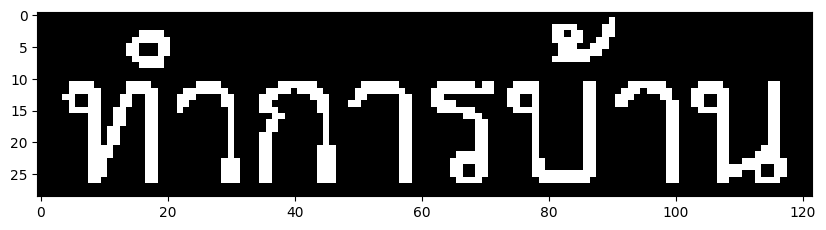

'\n# โหลดภาพ\nimg = cv2.imread("../data/output_images/output/cca_29.jpg")\n\n# แปลงเป็น Grayscale\ngray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n\n# การ Threshold แบบ Adaptive Gaussian\nbinary_image = cv2.adaptiveThreshold(\n    gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51,30\n)\n\ncv2.imshow("image", binary_image)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n\nkernel = np.ones((4, 9), np.uint8)\ndummy_word_image = cv2.dilate(binary_image, kernel, iterations=1)\n\n# ใช้ Connected Component Analysis\nnum_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dummy_word_image, connectivity=8)\n\n# จัดเรียงจากซ้ายไปขวา (ตามค่า x)\nsorted_indices = np.argsort(stats[1:, 0])  # ข้าม background (index 0)\nsorted_stats = stats[1:][sorted_indices]  # จัดเรียง stats ใหม่\nsorted_centroids = centroids[1:][sorted_indices]  # จัดเรียง centroids ใหม่\n\n\nexpand_ratio = 0.0  # อัตราส่วนการขยาย (0.5 คือ 50% ของขนาดเดิม)\nreduce_size = 0.00\n# วาดกรอบตามลำดับ\

In [3]:
import cv2
from matplotlib import table
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def detect_text_in_group(binary_image):
    kernel = np.ones((4, 9), np.uint8)
    dummy_image = cv2.dilate(binary_image, kernel, iterations=1)

    sub_text_images = []
    # ใช้ Connected Component Analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dummy_image, connectivity=8)

    expand_ratio = 0.0  # อัตราส่วนการขยาย (0.5 คือ 50% ของขนาดเดิม)
    reduce_size = 0.00
    for idx, i in enumerate(range(1, num_labels)):  # เริ่มจาก 1 เพราะ 0 คือ background
        x, y, w, h, area = stats[i]
        x_exp = int(x - (expand_ratio-reduce_size) * w)
        y_exp = int(y - (expand_ratio) * h)
        w_exp = int(w + 2 * (expand_ratio-reduce_size) * w)
        h_exp = int(h + 2 * (expand_ratio) * h)

        # ตรวจสอบไม่ให้เกินขอบภาพ
        x_exp = max(0, x_exp)
        y_exp = max(0, y_exp)
        w_exp = min(binary_image.shape[1] - x_exp, w_exp)
        h_exp = min(binary_image.shape[0] - y_exp, h_exp)

        cca_img = binary_image[y_exp:y_exp+h_exp, x_exp:x_exp+w_exp]
        sub_text_images.append(cca_img)
        cv2.imwrite(f"../data/output_images/output/text_sub/cca_{idx}.jpg", cca_img)
        cv2.rectangle(image, (x_exp, y_exp), (x_exp + w_exp, y_exp + h_exp), (0, 255, 0), 1)

    return sub_text_images 

#text_images = detect_text_in_group(dilalated_img, binary_image)

text_group_sub_images = []
for idx_text, text_group in enumerate(text_group_images):
    #print(idx_text)
    text_group_sub_images.append(detect_text_in_group(text_group))

print("จำนวนกลุ่มข้อความ:", len(text_group_sub_images)) 
print(" จำนวนข้อความย่อยในกลุ่มข้อความ:", len(text_group_sub_images[0]))  

plt.figure(figsize=(10,10))
plt.imshow(text_group_sub_images[2][0], cmap="gray")
#plt.title(f"text")
plt.show()

'''
# โหลดภาพ
img = cv2.imread("../data/output_images/output/cca_29.jpg")

# แปลงเป็น Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# การ Threshold แบบ Adaptive Gaussian
binary_image = cv2.adaptiveThreshold(
    gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51,30
)

cv2.imshow("image", binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

kernel = np.ones((4, 9), np.uint8)
dummy_word_image = cv2.dilate(binary_image, kernel, iterations=1)

# ใช้ Connected Component Analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dummy_word_image, connectivity=8)

# จัดเรียงจากซ้ายไปขวา (ตามค่า x)
sorted_indices = np.argsort(stats[1:, 0])  # ข้าม background (index 0)
sorted_stats = stats[1:][sorted_indices]  # จัดเรียง stats ใหม่
sorted_centroids = centroids[1:][sorted_indices]  # จัดเรียง centroids ใหม่


expand_ratio = 0.0  # อัตราส่วนการขยาย (0.5 คือ 50% ของขนาดเดิม)
reduce_size = 0.00
# วาดกรอบตามลำดับ
print(f'-----------------------------------------')
for idx, stat in enumerate(sorted_stats):
    #print(f'{idx} {stat}, x+y:{(stat[0]+stat[1])}, y+h:{(stat[1]+stat[3])}, x+w:{(stat[0]+stat[2])}')
    x, y, w, h, area = stat
    x_exp = int(x - (expand_ratio-reduce_size) * w)
    y_exp = int(y - (expand_ratio) * h)
    w_exp = int(w + 2 * (expand_ratio-reduce_size) * w)
    h_exp = int(h + 2 * (expand_ratio) * h)

    # ตรวจสอบไม่ให้เกินขอบภาพ
    x_exp = max(0, x_exp)
    y_exp = max(0, y_exp)
    w_exp = min(img.shape[1] - x_exp, w_exp)
    h_exp = min(img.shape[0] - y_exp, h_exp)

    cca_img = img[y_exp:y_exp+h_exp, x_exp:x_exp+w_exp]

    cv2.imwrite(f"../data/output_images/output/word/cca_word_{idx}.jpg", cca_img)
    cv2.rectangle(img, (x_exp, y_exp), (x_exp + w_exp, y_exp + h_exp), (0, 255, 0), 1)
    #print(f"Component {idx}: x={x}, y={y}, w={w}, h={h}, area={area}")

cv2.imwrite("../data/output_images/output/word/cca.jpg", img)

'''


## จับตัวอักษร

In [49]:
import numpy as np

def percentage_difference(value1, value2):
    return abs(value1 - value2) / value1 * 100

def sort_and_swap(stats):

    if(len(stats) > 1):
        #print("    มีหลาย level")

        """
        จัดเรียงข้อมูลใน stats โดยเรียงจาก y + h (มากไปน้อย)
        และตรวจสอบว่าข้อมูลที่มี area ใหญ่ที่สุดอยู่ในตำแหน่งแรกสุดหรือไม่
        """
        # คำนวณค่า y + h สำหรับการจัดเรียง
        stats_with_indices = [(i, stat) for i, stat in enumerate(stats)]
        stats_with_indices.sort(key=lambda x: x[1][1] + x[1][3], reverse=True)  # y + h (มาก -> น้อย)

        # สร้างลิสต์ใหม่หลังการจัดเรียง
        sorted_stats = [stat for _, stat in stats_with_indices]
        sorted_stats = np.array(sorted_stats)

        # สร้างคอลัมน์ใหม่ที่มีค่าเริ่มต้นจาก 0 และเพิ่มทีละ 1
        rows = sorted_stats.shape[0]  # จำนวนแถว
        new_column = np.arange(rows).reshape(-1, 1)  # คอลัมน์ [0, 1, 2, ...]

        # เพิ่มคอลัมน์ใหม่เข้าไปใน array เดิม
        sorted_stats = np.hstack((sorted_stats, new_column))

        # หาค่า area ที่ใหญ่ที่สุดและตำแหน่ง
        areas = [stat[4] for stat in sorted_stats]  # ค่า area อยู่ใน index ที่ 4
        max_area = max(areas)
        max_area_index = areas.index(max_area)

        # ตรวจสอบว่า area ที่ใหญ่ที่สุดอยู่ตำแหน่งแรกหรือไม่
        if max_area_index != 0:
            # สลับตำแหน่งตัวที่มี area ใหญ่ที่สุดกับตัวแรก
            sorted_stats[0], sorted_stats[max_area_index] = sorted_stats[max_area_index], sorted_stats[0]
        elif max_area_index == 0:
            sorted_stats[:, -1]+=1

        if len(sorted_stats == 2):
            difference = percentage_difference(sorted_stats[0][4], sorted_stats[1][4])
            #print(difference)
            if(difference <= 8):
                sorted_stats[0][-1] = 2
                sorted_stats[1][-1] = 2

        return sorted_stats
    else:
        #print("    มี level เดียว")

        new_values = [1]  # ต้องมีจำนวนเท่ากับจำนวนแถว

        # เพิ่มเลขในตำแหน่งสุดท้ายของทุกแถว
        new_values_column = np.array(new_values).reshape(-1, 1)  # แปลงเป็นคอลัมน์
        stats = np.hstack([stats, new_values_column])

        return stats


def char_level(char_image):
    debug = False  # ตั้งค่าเปิด/ปิด Debug

    kernel = np.ones((1, 1), np.uint8)
    dummy_image = cv2.dilate(char_image, kernel, iterations=1)

    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(char_image, connectivity=8)
    sorted_stats = sort_and_swap(stats[1:])
    char_level_group = []
    
    for idx, stats in enumerate(sorted_stats):  # เริ่มจาก 1 เพราะ 0 คือ background
        if(len(stats) == 6):
            x, y, w, h, area, level = stats
        else:
            x, y, w, h, area = stats

        #print(stats)
        # กรอง noise หรือส่วนที่ไม่ใช่ข้อความ
        if (w <= 2 and h <= 2):  # ปรับค่าตามความเหมาะสม
            continue

        cca_img = char_image[y:y+h, x:x+w]
        char_level_group.append([cca_img, level])
        #cv2.imwrite(f"../data/test_images/char_level/cca_{idx}.jpg", cca_img)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        #cv2.imwrite(f"../data/test_images/char_level/dummy_image.jpg", dummy_image)
        
        if debug:
            plt.figure(figsize=(1,1))
            plt.imshow(cca_img, cmap="gray")
            plt.title(f"text")
            plt.show()

    #print(f"Number of characters detected: {len(char_level_group)}")
    return char_level_group 

#cv2.imwrite(f"../data/test_images/char_level/cca.jpg", image)

'''
cv2.imshow("test", binary_image_test)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

def detect_char(binary_image):
    debug = False  # ตั้งค่าเปิด/ปิด Debug

    kernel = np.ones((4, 1), np.uint8)
    dummy_image = cv2.dilate(binary_image, kernel, iterations=1)

    char_images = []
    # ใช้ Connected Component Analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dummy_image, connectivity=8)

    # กรองข้อมูล Background และจัดเรียงจากซ้ายไปขวา (ตามค่า x)
    char_stats = stats[1:]  # ข้าม Background (index 0)
    sorted_indices = np.argsort(char_stats[:, 0])  # จัดเรียงตามค่า x (คอลัมน์ที่ 0)
    sorted_stats = char_stats[sorted_indices]

    for idx, stat in enumerate(sorted_stats):  # เริ่มจาก 1 เพราะ 0 คือ background
        x, y, w, h, area = stat

        # ตัดภาพใน Bounding Box
        cca_img = binary_image[y:y+h, x:x+w]

        if debug:
            plt.figure(figsize=(1, 1))
            plt.imshow(cca_img, cmap="gray")
            plt.title(f"Character {idx}")
            plt.show()

        # ใช้ฟังก์ชัน char_level เพื่อแยกตัวอักษรย่อย
        char_leveled = char_level(cca_img)

        # รวมตัวอักษรย่อยในรายการ
        char_images.extend(char_leveled)
        #cv2.imwrite(f"../data/output_images/output/text_sub/cca_{idx}.jpg", cca_img)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

    return char_images 

text_group_sub_char_images = []
for idx_group, text_group in enumerate(text_group_sub_images):
    print("กลุ่มข้อความที่:", idx_group+1)

    char_in_sub_text = []
    for idx_sup, sub_text in enumerate(text_group):
        print("   ข้อความย่อยที่:", idx_sup+1)
        char_images = detect_char(sub_text)
        char_in_sub_text.append(char_images)
        #for idx_char, char in enumerate(sub_text):
        #   print("    อักษรที่:", idx_char+1)

    text_group_sub_char_images.append(char_in_sub_text)



กลุ่มข้อความที่: 1
   ข้อความย่อยที่: 1
   ข้อความย่อยที่: 2
   ข้อความย่อยที่: 3
กลุ่มข้อความที่: 2
   ข้อความย่อยที่: 1
   ข้อความย่อยที่: 2
   ข้อความย่อยที่: 3
กลุ่มข้อความที่: 3
   ข้อความย่อยที่: 1


จำนวนกลุ่มข้อความ: 3
 จำนวนข้อความย่อยในกลุ่มข้อความ: 3
    จำนวนตัวอักษรในข้อความย่อย: 41
       ตัวอักษรและ level: 2
           level: 3


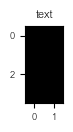

'\nfor idx, char in enumerate(text_group_sub_char_images[1][0]):\n    plt.figure(figsize=(1,1))\n    plt.imshow(char, cmap="gray")\n    cv2.imwrite(f"../data/output_images/noise/noise_{idx}.jpg", char)\n    plt.title(f"text")\n    plt.show()\n'

In [87]:
print("จำนวนกลุ่มข้อความ:", len(text_group_sub_char_images)) 
print(" จำนวนข้อความย่อยในกลุ่มข้อความ:", len(text_group_sub_char_images[0]))
print("    จำนวนตัวอักษรในข้อความย่อย:", len(text_group_sub_char_images[0][0]))
print("       ตัวอักษรและ level:", len(text_group_sub_char_images[0][0][0]))
print("           level:", text_group_sub_char_images[0][0][23][1])



plt.figure(figsize=(1,1))
plt.imshow(text_group_sub_char_images[0][0][23][0], cmap="gray")
plt.title(f"text")
plt.show()


'''
for idx, char in enumerate(text_group_sub_char_images[1][0]):
    plt.figure(figsize=(1,1))
    plt.imshow(char, cmap="gray")
    cv2.imwrite(f"../data/output_images/noise/noise_{idx}.jpg", char)
    plt.title(f"text")
    plt.show()
'''


## Predict images V2

In [9]:
from tensorflow.keras.models import load_model
model_path = "../models/thai_and_numerals_model.h5"
model = load_model(model_path)

4/4 [==============================] - 0s 4ms/step
13
59
52
37
42
52
43
55
10
17
68
68
32
29
55
63
36
44
62
17
13
32
57
70
29
59
16
11
71
52
22
42
45
52
52
10
42
55
17
55
10
65
35
62
50
3
32
44
53
26
62
39
13
66
30
71
52
16
65
26
19
29
71
32
70
68
71
16
41
55
48
55
66
32
43
62
62
45
61
68
41
55
48
55
52
55
68
16
10
64
48
63
29
43
62
32
13
63
34
63
45
43
57
0
6
50
32
73
55
10
55
44
35
71
55
34
Predicted Letter: ค, Confidence: 1.00
Predicted Letter: ื, Confidence: 1.00
Predicted Letter: อ, Confidence: 1.00
Predicted Letter: ผ, Confidence: 1.00
Predicted Letter: ม, Confidence: 1.00
Predicted Letter: อ, Confidence: 1.00
Predicted Letter: ย, Confidence: 1.00
Predicted Letter: า, Confidence: 1.00
Predicted Letter: ก, Confidence: 1.00
Predicted Letter: จ, Confidence: 1.00
Predicted Letter: ั, Confidence: 0.98
Predicted Letter: ั, Confidence: 1.00
Predicted Letter: ท, Confidence: 1.00
Predicted Letter: ด, Confidence: 0.29
Predicted Letter: า, Confidence: 1.00
Predicted Letter: โ, Confidence: 0

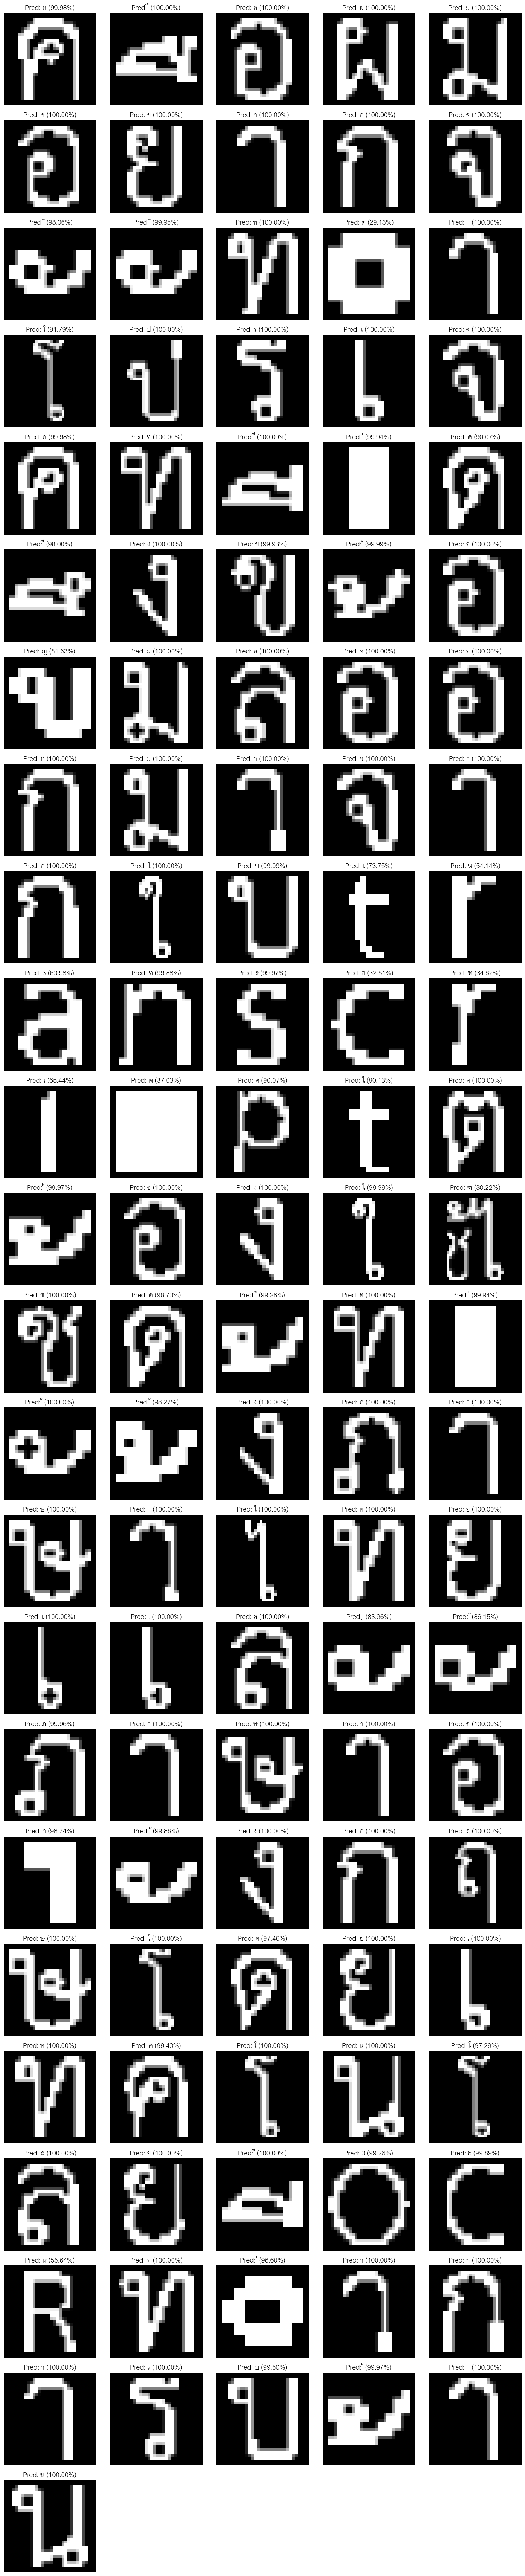

In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageOps
import math
import matplotlib.pyplot as plt
from matplotlib import rc

thai_and_numerails_characters = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',

    'ก', 'ข', 'ฃ', 'ค', 'ฅ', 'ฆ', 'ง', 'จ', 'ฉ', 'ช', 'ซ', 'ฌ', 'ญ', 'ฎ', 
    'ฏ', 'ฐ', 'ฑ', 'ฒ', 'ณ', 'ด', 'ต', 'ถ', 'ท', 'ธ', 'น', 'บ', 'ป', 'ผ', 
    'ฝ', 'พ', 'ฟ', 'ภ', 'ม', 'ย', 'ร', 'ล', 'ว', 'ศ', 'ษ', 'ส', 
    'ห', 'ฬ', 'อ', 'ฮ',

    'ะ', 'า', 'ิ', 'ี', 'ึ', 'ื', 'ุ', 'ู', 'เ', 'โ', 'ฤ', 'ใ', 'ไ', '็', 
    'ั', 'ํ',

    '่', '้', '๊', '๋',
]

letters_class = thai_and_numerails_characters

def resize_with_min_padding(image, desired_size, min_padding):
    """
    ปรับขนาดภาพให้ใกล้เคียง desired_size โดยลด Padding และเพิ่มการขยายภาพต้นฉบับ
    """
    if image is None or not isinstance(image, np.ndarray):
        raise ValueError("Input image must be a valid numpy array.")

    if not isinstance(desired_size, int) or desired_size <= 0:
        raise ValueError("desired_size must be a positive integer.")

    old_size = image.shape[:2]  # (height, width)
    max_size = max(old_size)

    # คำนวณอัตราส่วนการปรับขนาดให้ใกล้เคียง desired_size
    ratio = float(desired_size - 2 * min_padding) / max_size
    new_size = tuple([int(x * ratio) for x in old_size])  # ขนาดใหม่ (height, width)

    # Resize ภาพให้คงสัดส่วนเดิม แต่ใหญ่ขึ้น
    resized_image = cv2.resize(image, (new_size[1], new_size[0]), interpolation=cv2.INTER_AREA)

    # คำนวณ Padding ใหม่
    delta_w = max(desired_size - new_size[1], 0)  # Padding ด้านความกว้าง
    delta_h = max(desired_size - new_size[0], 0)  # Padding ด้านความสูง
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    # ตรวจสอบสีสำหรับ Grayscale หรือ RGB
    color = [0] if len(image.shape) == 2 else [0, 0, 0]

    # เพิ่ม Padding รอบภาพ
    padded_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

    return padded_image


# กำหนดขนาด Input ของโมเดล
input_size = 32  # ขนาด 32x32

# เตรียมข้อมูลจาก text_char_group_images
processed_images = []


text_block = []
for idx_text_group, text_group in enumerate(text_group_sub_char_images):
    #print("กลุ่มข้อความ", idx_text_group+1)
    for idx_text_sub, text_sub in enumerate(text_group):
        #print("  ข้อความย่อยในกลุ่มข้อความ", idx_text_sub+1)
        for idx_char, char in enumerate(text_sub):
            #print("    ตัวอักษร", idx_char+1)

            if char is None:
                print(f"Character image {idx_char} is None.")
                continue  # ข้ามภาพนี้
            else:
                #plt.figure(figsize=(1,1))
                #plt.imshow(char_img, cmap="gray")

                # เพิ่ม Padding และปรับขนาดภาพ
                padded_img = resize_with_min_padding(char, input_size, min_padding=2)

                # Normalization (เปลี่ยนค่าพิกเซลให้อยู่ในช่วง [0, 1])
                normalized_img = padded_img / 255.0

                # เพิ่มช่องทางสี (Channel) สำหรับโมเดลที่รองรับ Input แบบ (Height, Width, Channels)
                if len(normalized_img.shape) == 2:  # หากภาพเป็น Grayscale (2D)
                    normalized_img = np.expand_dims(normalized_img, axis=-1)

                # เก็บภาพที่ประมวลผลแล้ว
                    processed_images.append(normalized_img)

# แปลงเป็น NumPy Array
processed_images = np.array(processed_images)

# ทำนายผลลัพธ์
predictions = model.predict(processed_images)

# แปลงค่าความน่าจะเป็นเป็นคลาสที่คาดการณ์ได้ และ Confidence Score
predicted_classes = np.argmax(predictions, axis=1)
confidence_scores = np.max(predictions, axis=1)  # ดึงค่าสูงสุดจากแต่ละแถว (ความมั่นใจของคลาสที่ทำนาย)

for i, pred_class in enumerate(predicted_classes):
    print(pred_class)
    predicted_letter = letters_class[pred_class]  # แปลงคลาสเป็นตัวอักษร
    confidence = confidence_scores[i]  # คะแนนความมั่นใจ
    text_block.append((predicted_letter, confidence))  # เก็บผลลัพธ์

# แสดงผลลัพธ์
for letter, confidence in text_block:
    print(f"Predicted Letter: {letter}, Confidence: {confidence:.2f}")
    #predicted_text = ''.join([letter for letter, confidence in text_block])
    #print(f"Predicted Text: {predicted_text}")

# แสดงผลลัพธ์พร้อมภาพ
num_images = len(processed_images)
columns = 5  # จำนวนคอลัมน์ที่ต้องการ
rows = math.ceil(num_images / columns)  # คำนวณจำนวนแถวตามจำนวนภาพ

# ตั้งค่าฟอนต์ภาษาไทย
rc('font', family='Cordia New')  # ใส่ชื่อฟอนต์ที่มีในระบบ

#plt.figure(figsize=(5, rows * 1))  # ปรับขนาดของกราฟให้รองรับจำนวนแถว
plt.figure(figsize=(columns * 3, rows * 3))  # ขนาดของกราฟสัมพันธ์กับจำนวนแถวและคอลัมน์
for idx, (padded_img, pred_label, confidence) in enumerate(zip(processed_images, predicted_classes, confidence_scores)):
    plt.subplot(rows, columns, idx + 1)  # ปรับ subplot ตามจำนวนแถวและคอลัมน์

    # แปลงภาพกลับเป็น 2D สำหรับการแสดงผล (ในกรณีที่เป็น (height, width, 1))
    if padded_img.shape[-1] == 1:
        padded_img = padded_img.squeeze()
    
    plt.imshow(padded_img, cmap='gray')  # แสดงภาพ Grayscale
    #plt.title(f"Pred: {pred_label + 1}", fontsize=10)  # แสดง Label ที่ทำนาย
    plt.title(f"Pred: {letters_class[pred_label]} ({confidence:.2%})", fontsize=20)  # แสดง Label และ % Confidence
    plt.axis('off')  # ปิดแกน

    print(f"Character {idx}: Predicted Label = {letters_class[pred_label]} ({confidence:.2%})")

plt.tight_layout()  # จัด Layout ให้ชิดกัน
plt.show()


In [36]:
def percentage_difference(value1, value2):
    return abs(value1 - value2) / value1 * 100

# ตัวอย่าง
value1 = 55
value2 = 50
difference = percentage_difference(value1, value2)
print(f"ความต่างระหว่าง {value1} กับ {value2} คือ {difference:.2f}%")

ความต่างระหว่าง 55 กับ 50 คือ 9.090909090909092%
